In [3]:
from PIL import Image
import matplotlib.pyplot as pl
import numpy as np

In [17]:
import cv2

In [55]:
baby=Image.open('baby.jfif')
woman=Image.open('oldwoman.jfif')

In [56]:
baby=cv2.imread('baby.jfif')
woman=cv2.imread('oldwoman.jfif')


baby.shape,woman.shape

((183, 275, 3), (749, 852, 3))

In [57]:
baby = cv2.cvtColor(baby, cv2.COLOR_BGR2GRAY)/255
woman = cv2.cvtColor(woman, cv2.COLOR_BGR2GRAY)/255
baby.shape,woman.shape

((183, 275), (749, 852))

In [58]:
baby_np=np.resize(baby,(200,275))
woman_np=np.resize(woman,(180,275))


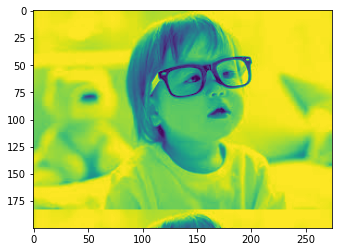

In [59]:
pl.imshow(baby_np)

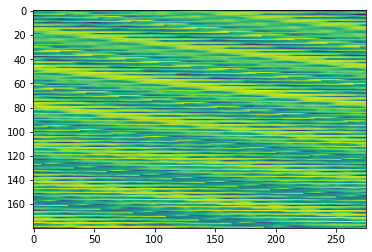

In [60]:
pl.imshow(woman_np)

In [66]:
def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx


    
def load_image(path):
    """ Load image from path. Return a numpy array """
    image = Image.open(path)
    return np.asarray(image) / 255

In [67]:
try:
    image_path = sys.argv[1]
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please specify an image


In [69]:
image = load_image('baby.jfif')
w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

Image found with width: 183, height: 275, depth: 3
